# 📊 Portfolio Optimization & Efficient Frontier

This notebook demonstrates **Modern Portfolio Theory** by:
- Fetching historical stock prices
- Calculating expected returns & risk
- Simulating thousands of random portfolios
- Plotting the **Efficient Frontier**
- Identifying the **optimal Sharpe ratio portfolio**

Tech stack: `Python`, `yfinance`, `numpy`, `pandas`, `matplotlib`


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")  # nicer plots


## 1️⃣ Choose Stocks

We'll analyze 5 popular tech stocks.


In [2]:
tickers = ["AAPL", "TSLA", "MSFT", "AMZN", "NVDA"]
start_date = "2020-01-01"


## 2️⃣ Fetch Historical Price Data

Using the `yfinance` API to get **adjusted closing prices**.


In [4]:

data = yf.download(tickers, start=start_date)  # auto_adjust=True by default
data = data['Close']  # Already adjusted
print(data.tail())


C:\Users\Liam Sydney\AppData\Local\Temp\ipykernel_19632\712159135.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date)  # auto_adjust=True by default
[*********************100%***********************]  5 of 5 completed

Ticker            AAPL        AMZN        MSFT        NVDA        TSLA
Date                                                                  
2025-07-10  212.410004  222.259995  501.480011  164.100006  309.869995
2025-07-11  211.160004  225.020004  503.320007  164.919998  313.510010
2025-07-14  208.619995  225.690002  503.019989  164.070007  316.899994
2025-07-15  209.110001  226.350006  505.820007  170.699997  310.779999
2025-07-16  210.634995  223.154999  505.424988  171.179901  320.800598


## 3️⃣ Calculate Daily Returns, Mean Returns, and Covariance Matrix


In [6]:
returns = data.pct_change().dropna()

mean_returns = returns.mean()           # average daily returns
cov_matrix = returns.cov()              # daily covariance matrix

annual_mean_returns = mean_returns * 252  # annualized returns
annual_cov_matrix = cov_matrix * 252      # annualized covariance

annual_mean_returns, annual_cov_matrix


(Ticker
 AAPL    0.245802
 AMZN    0.219917
 MSFT    0.262579
 NVDA    0.756746
 TSLA    0.668341
 dtype: float64,
 Ticker      AAPL      AMZN      MSFT      NVDA      TSLA
 Ticker                                                  
 AAPL    0.105721  0.070517  0.071908  0.105188  0.110163
 AMZN    0.070517  0.129965  0.074679  0.116027  0.111251
 MSFT    0.071908  0.074679  0.091901  0.112860  0.094225
 NVDA    0.105188  0.116027  0.112860  0.297589  0.178447
 TSLA    0.110163  0.111251  0.094225  0.178447  0.462929)

## 4️⃣ Monte Carlo Simulation of Random Portfolios

We will:
- Generate 5000 random portfolios
- Compute their **expected return**, **volatility**, and **Sharpe ratio**


In [8]:
num_portfolios = 5000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)
    
    portfolio_return = np.sum(weights * annual_mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annual_cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    
    results[0, i] = portfolio_volatility
    results[1, i] = portfolio_return
    results[2, i] = sharpe_ratio


## 5️⃣ Plot Efficient Frontier

Each dot = 1 portfolio  
Color = **Sharpe Ratio**


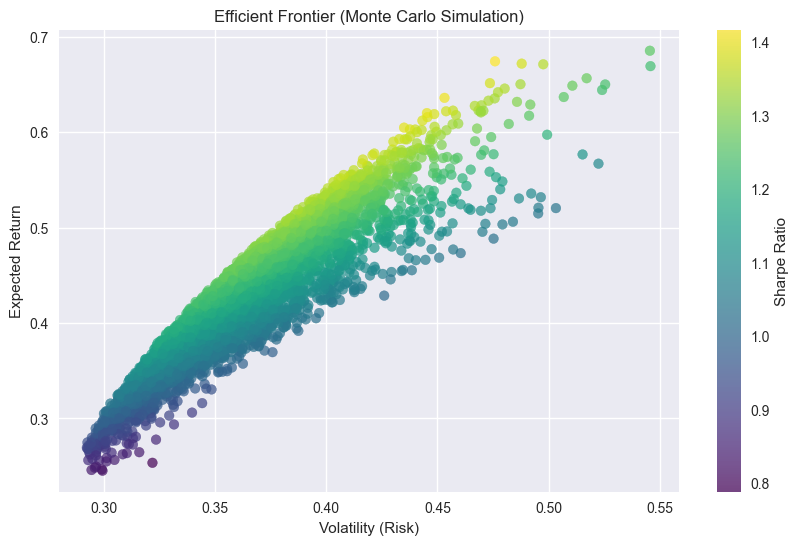

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis', alpha=0.7)
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (Monte Carlo Simulation)')
plt.colorbar(label='Sharpe Ratio')
plt.show()


## 6️⃣ Find Optimal Portfolio

We’ll identify:
- The **maximum Sharpe ratio portfolio**
- The **minimum volatility portfolio**


In [10]:
max_sharpe_idx = np.argmax(results[2])
best_weights = weights_record[max_sharpe_idx]

print("✅ Optimal Portfolio Weights:")
for ticker, w in zip(tickers, best_weights):
    print(f"{ticker}: {w:.2%}")


✅ Optimal Portfolio Weights:
AAPL: 6.77%
TSLA: 0.90%
MSFT: 5.58%
AMZN: 69.28%
NVDA: 17.46%


## ✅ Conclusion

- We simulated 5000 random portfolios
- Identified the portfolio with the **best Sharpe ratio**
- Plotted the **efficient frontier**

### Next steps:
- Use convex optimization (`cvxpy`) to compute exact efficient frontier
- Add constraints (e.g., no more than 30% in any stock)
- Build an interactive **Streamlit app**
